In [10]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [11]:
Operators = ["+", '-', '*', '/', "sin" , "cos"]
Values = list (range(1,11))
variable = ['x']

In [12]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return 2*x

In [13]:
X_train = np.random.randint(1, 1000, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([ 896,  600, 1814,  902, 1066, 1540,  490,  256, 1992,  704,  360,
       1248, 1730, 1866, 1796,  472,  138, 1266,  456,  982, 1864,  564,
        544, 1690,  916,  296,  192,  330, 1782,   58, 1952, 1002, 1560,
        276, 1874, 1384, 1778, 1242,  806,  758,  376,  984,  154, 1610,
       1292,  618, 1042,  200, 1922,  390,  296, 1542, 1800,  290, 1078,
        688,  278, 1796,  276, 1146,  212, 1416, 1104,  934,  756, 1356,
        108,  634,  342,  530,  122,  446,  358,  136, 1114, 1904, 1558,
        602, 1294,   32,  184, 1876,  640, 1906, 1196, 1592,  422, 1116,
       1700, 1520, 1544,  626,  336,  420, 1604, 1102,  908, 1110,  604,
        574])

In [14]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [15]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                temp_node = Node (operator=temp_op, children=["x"])
                temp_node.isLeaf = True
                return temp_node
            else :
                child = random.choice(Values)
                temp_node = Node (operator= temp_op , children=["x",child])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    node.value = self.SinCosOp (node , val)
                    # return node.value
                else :
                    node.value = self.OtherOp (node , val , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp (self , node , val1 , val2):
        if (node.operator == "+"):
            return val1+val2
        elif (node.operator == "-"):
            return val1-val2
        elif (node.operator == "*"):
            return val1*val2
        elif (node.operator == "/"):
            if(val2==0):
                return 1
            return val1/val2
        elif (node.operator == "^"):
            if(val1==0 and val2<0):
                    return 1
            else: 
                # return left_val ** right_val
                if(val2==0):
                    return 1
                x = 1
                i = 0
                while(not flag and i<val2):
                    x = x*val1
                    i+=1
                    if(x>100000 or x<-100000):
                        flag = True
                        return 1
                return x

    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [16]:
treeList = []
for i in range (42):
    my_tree = Tree(random.randint(1 , 5))
    my_tree.create()
    treeList.append(my_tree)
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

((x + 3) - sin(x))
((x + 1) * (x - 1))
cos(x)
cos(((x + 2) * ((x / 9) - (x / 4))))
(sin(x) / sin(x))
(((cos(cos((x / 1))) + (sin((x - 3)) / ((x - 9) / (x - 2)))) / (((x - 3) * ((x + 3) + (x / 1))) + (cos(x) + ((x + 1) + cos(x))))) / ((sin(x) + ((sin(x) * (x / 9)) * sin((x + 9)))) + (x - 7)))
(((x - 4) - sin(((x * 1) / (x / 9)))) * ((((x + 3) * (x * 8)) + ((x / 7) - (x + 3))) - sin(((x / 5) / sin(x)))))
(x + 2)
cos(x)
sin(x)
((x - 5) - (x * 8))
(cos(x) - (x + 7))
cos(cos(((x * 6) - ((x - 10) * (x - 4)))))
(x + 10)
((x + 8) / (cos(x) / (x + 1)))
cos((x / 2))
((x / 6) + (x + 10))
cos((x + 2))
(cos(x) * (x * 6))
sin(cos((x / 6)))
(sin(((x / 5) - sin(x))) * (x + 4))
((((x - 8) * (cos((x + 6)) + (sin(x) + (x - 9)))) / ((x * 5) / (x + 4))) - (x + 8))
((((x / 10) - cos(((x - 2) - sin(x)))) / cos((((x - 4) / cos(x)) - (x * 3)))) - sin(((x - 7) - (cos((x * 9)) - (x + 7)))))
(x * 9)
sin(sin((x - 4)))
cos((x * 4))
(sin(x) - (x / 8))
((x - 2) - (((x + 1) + sin((x - 2))) / sin(cos(x))))
((x / 2) + s

In [17]:
avg = []
for i in range (100):
    bestTrees = []
    bestTreesIndex = mseTree.argsort()[:5]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    otherTrees = []
    # print (bestTreesIndex)
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, 2)
    for element in random_elements :
         bestTrees.append(element)
    # print ("--------------------")
    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1= temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice (nodes1)
            select2 = random.choice (nodes2)

            # print ("Before change")
            # temp1.printTree()
            # temp2.printTree()

            # print ("Selected Nodes:")
            # temp1.printTree(select1)
            # temp2.printTree(select2)

            temp1.ReplaceNode (select1 , select2)
            temp2.ReplaceNode (select2 , select1)

            # print ("After change")
            # temp1.printTree()
            # temp2.printTree()

            treeList.append(temp1)
            treeList.append(temp2)
            
            # print ("Child created!")
            # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:5]
    # avg.append(mean (lowest_five))
    avg.append(sum(lowest_five) / len(lowest_five))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:5]
bestTreesIndex = mseTree.argsort()[:5]
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


((x - 8) + (x + 10))
((x - 8) + (x + 10))
((x + 10) + (x - 8))
((x + 10) + (x - 8))
((x + 10) + (x - 8))


[169416.4122222222,
 190.4,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0]

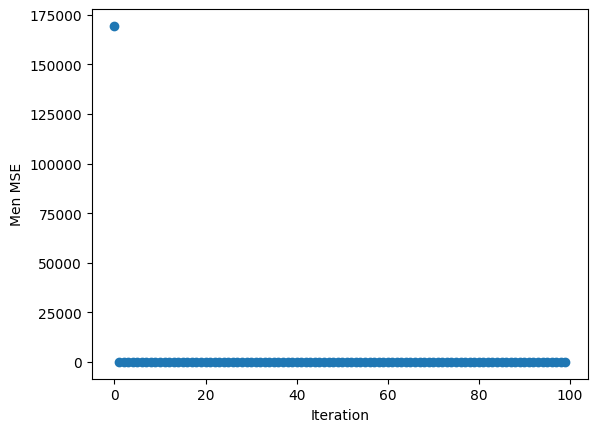

In [18]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()